과대적합과 과소적합

**과대적합(Overfitting)**과 **과소적합(Underfitting)**은 모델이 데이터를 얼마나 잘 이해했는지 판단하는 중요한 기준입니다.

과대적합 (Overfitting)

모델이 훈련 데이터에 너무 딱 맞게 학습되어, 훈련 데이터에서는 높은 성능을 보이지만, 새로운(테스트) 데이터에서는 성능이 떨어지는 현상입니다.

비유: 시험 범위를 모두 외워버린 학생이, 응용 문제가 나오면 틀리는 것과 같습니다.

과소적합 (Underfitting)

모델이 훈련 데이터의 패턴을 제대로 파악하지 못해, 훈련 데이터와 테스트 데이터 모두에서 성능이 낮은 현상입니다.

비유: 시험공부를 아예 하지 않아서 어떤 문제가 나와도 틀리는 것과 같습니다.

모델의 성능을 제대로 평가하려면, 훈련 세트와 테스트 세트의 정확도를 모두 확인하여 이 두 현상 중 어떤 문제에 해당하는지 진단해야 합니다.

In [10]:
# 필요한 라이브러리를 모두 불러옵니다.
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. 와인 데이터를 불러와 특성(X)과 타겟(y)을 분리합니다.
df = pd.read_csv("https://bit.ly/wine_csv_data")
X = df[['alcohol', 'sugar', 'pH']]
y = df['class']

# 2. 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 3. 스케일링을 적용합니다.
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# 4. 모델을 훈련합니다.
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled, y_train)

# 5. 모델의 정확도를 평가합니다.
# 과대적합(Overfitting): 훈련 정확도 >> 테스트 정확도 (모델이 훈련 데이터에 너무 맞춰진 현상)
# 과소적합(Underfitting): 훈련 정확도 ≈ 테스트 정확도 (모두 낮음. 모델이 데이터를 제대로 학습하지 못한 현상)
# 이 두 점수의 차이를 통해 모델이 어떤 상태인지 판단합니다.

# 훈련 세트의 정확도를 계산합니다.
train_score = dt.score(X_train_scaled, y_train)
print("--- 훈련 세트 정확도 확인 ---")
print(f"훈련 세트 정확도: {train_score:.4f}")

# 테스트 세트의 정확도를 계산합니다.
test_score = dt.score(X_test_scaled, y_test)
print("\n--- 테스트 세트 정확도 확인 ---")
print(f"테스트 세트 정확도: {test_score:.4f}")


--- 훈련 세트 정확도 확인 ---
훈련 세트 정확도: 0.9977

--- 테스트 세트 정확도 확인 ---
테스트 세트 정확도: 0.8677


In [11]:
# 4. 모델의 복잡도를 조절하며 훈련합니다.
# 과대적합 해결을 위해 max_depth를 3으로 설정하여 트리의 깊이를 제한합니다.
# max_depth를 별도로 설정하지 않으면 **기본값은 None**입니다.
# max_depth=None이라는 것은 트리의 깊이에 제한을 두지 않는다는 의미입니다. 
# 그래서 트리가 최대한 깊게 자라도록 학습하게 됩니다.

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train_scaled, y_train)

# 5. 모델의 정확도를 평가합니다.
# 훈련 세트의 정확도를 계산합니다.
train_score = dt.score(X_train_scaled, y_train)
print("--- 훈련 세트 정확도 확인 (max_depth=3) ---")
print(f"훈련 세트 정확도: {train_score:.4f}")

# 테스트 세트의 정확도를 계산합니다.
test_score = dt.score(X_test_scaled, y_test)
print("\n--- 테스트 세트 정확도 확인 (max_depth=3) ---")
print(f"테스트 세트 정확도: {test_score:.4f}")


--- 훈련 세트 정확도 확인 (max_depth=3) ---
훈련 세트 정확도: 0.8473

--- 테스트 세트 정확도 확인 (max_depth=3) ---
테스트 세트 정확도: 0.8375


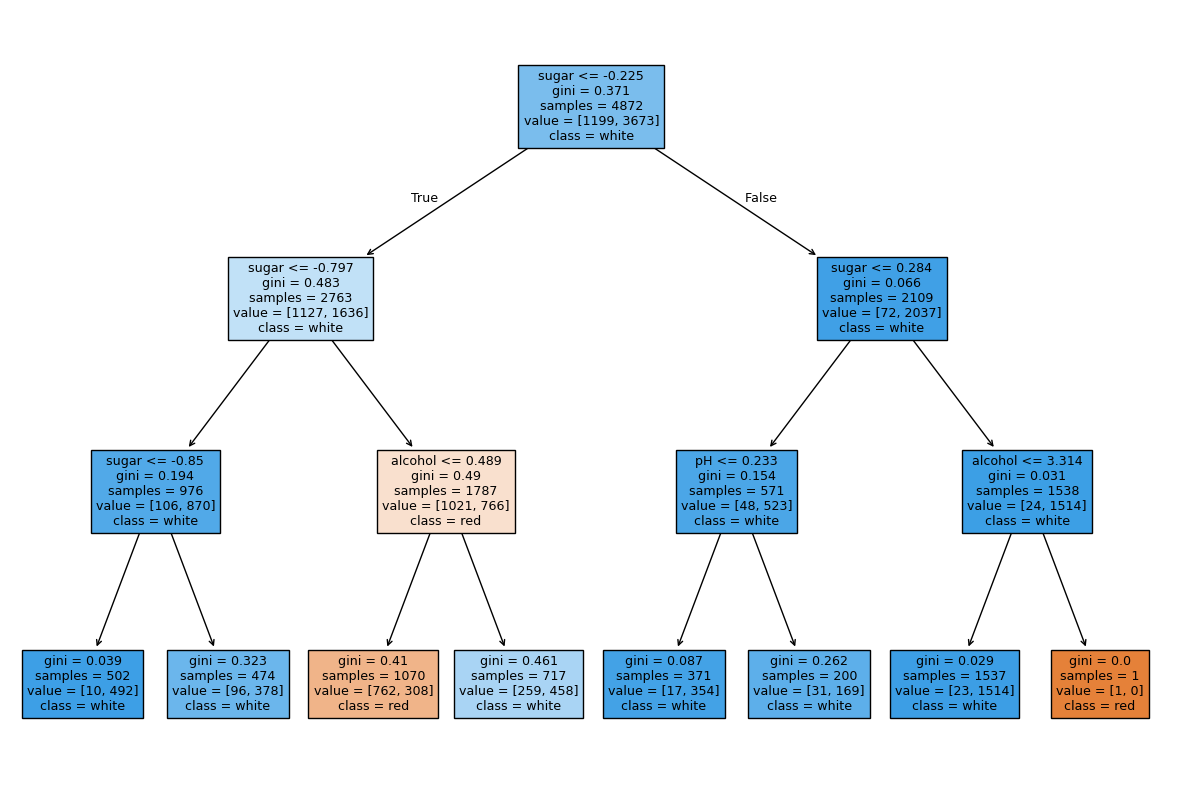

In [1]:
# 결정 트리 시각화 (스케일링된 데이터)

# 필요한 라이브러리를 불러옵니다.
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. 와인 데이터를 불러와 특성(X)과 타겟(y)을 분리합니다.
df = pd.read_csv("https://bit.ly/wine_csv_data")
X = df[['alcohol', 'sugar', 'pH']]
y = df['class']

# 2. 데이터를 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)

# 3. 스케일링을 적용합니다.
# 모델이 각 특성(alcohol, sugar, pH)의 값 크기에 영향을 받지 않도록 합니다.
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

# 4. max_depth=3으로 설정된 모델을 스케일링된 데이터로 훈련합니다.
dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train_scaled, y_train)

# 5. 결정 트리를 시각화합니다.
# 이 트리는 스케일링된 데이터를 기준으로 만들어졌습니다.
plt.figure(figsize=(15, 10))
plot_tree(
    dt,
    feature_names=['alcohol', 'sugar', 'pH'],
    class_names=['red', 'white'],
    filled=True
)
plt.show()
